<a href="https://colab.research.google.com/github/GregSvein55/Canola-Disease-Detection/blob/main/canola_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Canola Disease detection system

In [2]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

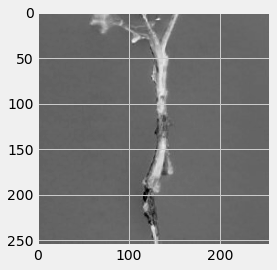

In [3]:
#Load the data
DATADIR = "/content/drive/MyDrive/training"
CATEGORIES = ["Diseased", "Healthy"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to healthy or diseased dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

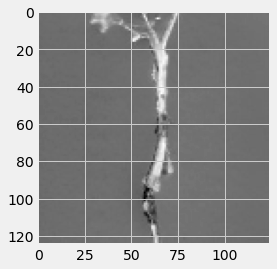

In [4]:
#RESIZING IMAGES
IMG_SIZE = 125

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
training_data = []
IMG_SIZE = 125

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to healthy or diseased dir
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        print("error")

create_training_data()

In [6]:
print(len(training_data))

640


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
1
1
1
0
0
1


In [9]:
x = []
y = []


In [10]:
for features, label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
NAME = "canola-diseased-cnn-256x2-{}".format(int(time.time()))


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))#Convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#Pooling

model.add(Conv2D(64, (3, 3)))#Convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#Pooling

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))  # Fully Connected Layer
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))# Fully Connected Layer

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=8, validation_split=0.3, callbacks=[tensorboard])#Output

model.save('Canola_Disease_CNN_Model')#Saving the model so we dont have to run it every time

Epoch 1/8
14/14 [==============================] - 20s 1s/step - loss: 0.8021 - accuracy: 0.5268 - val_loss: 0.6545 - val_accuracy: 0.5625
Epoch 2/8
14/14 [==============================] - 19s 1s/step - loss: 0.6340 - accuracy: 0.6272 - val_loss: 0.5133 - val_accuracy: 0.8125
Epoch 3/8
14/14 [==============================] - 19s 1s/step - loss: 0.4980 - accuracy: 0.7634 - val_loss: 0.4147 - val_accuracy: 0.8177
Epoch 4/8
14/14 [==============================] - 19s 1s/step - loss: 0.3771 - accuracy: 0.8281 - val_loss: 0.3382 - val_accuracy: 0.8542
Epoch 5/8
14/14 [==============================] - 18s 1s/step - loss: 0.3656 - accuracy: 0.8460 - val_loss: 0.3110 - val_accuracy: 0.8802
Epoch 6/8
14/14 [==============================] - 19s 1s/step - loss: 0.2312 - accuracy: 0.9152 - val_loss: 0.3259 - val_accuracy: 0.8542
Epoch 7/8
14/14 [==============================] - 17s 1s/step - loss: 0.5147 - accuracy: 0.8214 - val_loss: 0.3652 - val_accuracy: 0.8542
Epoch 8/8
14/14 [==========

In [13]:

DATADIR = "/content/drive/MyDrive/testing"
CATEGORIES = ["Diseased", "Healthy"]


def prepare(filepath):#Resizing and greyscaling the test image
  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("Canola_Disease_CNN_Model")

prediction = model.predict([prepare('/content/drive/MyDrive/testing/Healthy/test1.png')])
print(CATEGORIES[int(prediction[0][0])])



Healthy


In [14]:
prediction = model.predict([prepare('/content/drive/MyDrive/testing/Healthy/test2.png')])
print(CATEGORIES[int(prediction[0][0])])

Healthy


In [15]:
prediction = model.predict([prepare('/content/drive/MyDrive/testing/Diseased/test6.png')])
print(CATEGORIES[int(prediction[0][0])])

Diseased


In [16]:
prediction = model.predict([prepare('/content/drive/MyDrive/testing/Diseased/test8.png')])
print(CATEGORIES[int(prediction[0][0])])

Diseased
